In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
HOME = "/content/drive/My Drive/template_experiment/" # @param {type:"string"}

# Data Loading

In [4]:
import pandas as pd
import os

df_ftc_all = pd.read_csv(os.path.join(HOME, "other datasets - gold.csv"))
df_ftc_all

,Corpus,Fallacy Types,Other Types,Topic,Whole_Sentences,A,A',C,C',X,Template #,Arg. Consequences
0,argotario,Faulty Generalization,NaN,Should Christians accept same sex marriage?,"No, because if you start with same sex marriag...",NaN,NaN,NaN,NaN,NaN,5,NO
1,argotario,Faulty Generalization,NaN,Is it justified to develop nuclear energy for ...,Temelin exploded. It is never ok to use it.,NaN,NaN,NaN,NaN,NaN,5,NO
2,argotario,Faulty Generalization,NaN,Is there a good reason for the American war on...,If you fight once you will never stop fighting...,NaN,NaN,NaN,NaN,NaN,5,NO
3,argotario,Faulty Generalization,NaN,Is the grading system used in high school effe...,My son has developed anxiety because of the co...,continuous grading,NaN,all students,my son,NaN,1,YES
4,argotario,Faulty Generalization,NaN,Should we allow animal testing for medical pur...,Some people did already die because of medicin...,such medicine,NaN,all others,some people,NaN,1,YES
5,argotario,Faulty Generalization,NaN,Is it effective to censor parts of the media?,Hitler censored media. Kim yong il censored me...,only bad people,Hitler (and Kim),media,NaN,NaN,1,YES
6,argotario,Faulty Generalization,NaN,Should smoking at home be illegal?,In my region 40 % of the population is smoking...,smoking,40% of the population,non-smokers,NaN,NaN,1,YES
7,argotario,Faulty Generalization,NaN,Is television an effective tool in building th...,"All TV-Shows are bad. Look at ""the bachelor"". ...",all TV-Shows,"""the bachelor""",learn from it,NaN,NaN,1,YES
8,argotario,Faulty Generalization,NaN,Does school detention do any good in high school?,School detention in high school means more sch...,school detention,NaN,school,schoolmate of mine,NaN,1,YES
9,argotario,Faulty Generalization,NaN,Do school uniforms make school a more effectiv...,Uniforms have shown to be useful and well-acce...,uniforms,NaN,all schools,St. Blasien,NaN,3,YES


# Split the data

In [ ]:
annotator = "Paul"
stratified_sampling = False
df_ftc_all["Template #"] = df_ftc_all["Template # ({})".format(annotator)]

In [5]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

if os.path.exists(os.path.join(HOME, "data/corpus_dev.tsv")):
    print("Loading cache...")
    df_dev = pd.read_csv(os.path.join(HOME, "data/corpus_dev.tsv"), sep="\t")
    df_fs_train = pd.read_csv(os.path.join(HOME, "data/corpus_fs_train.tsv"), sep="\t")
    df_test = pd.read_csv(os.path.join(HOME, "data/corpus_test.tsv"), sep="\t")

else:
    if stratified_sampling:
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

        combined_labels = df_ftc_all.apply(lambda r: r["Fallacy Types"] + "_" + str(r["Template #"]), axis=1)
        folds = skf.split(df_ftc_all["No"], combined_labels)
        folds = [test for _, test in folds]

        dev_idx, fs_train_idx, test_idx = folds[0], folds[1], np.concatenate(folds[2:])
        df_dev, df_fs_train, df_test = df_ftc_all.iloc[dev_idx], df_ftc_all.iloc[fs_train_idx], df_ftc_all.iloc[test_idx]

        df_dev.to_csv(os.path.join(HOME, "data/corpus_dev.tsv"), sep="\t", index=False)
        df_fs_train.to_csv(os.path.join(HOME, "data/corpus_fs_train.tsv"), sep="\t", index=False)
        df_test.to_csv(os.path.join(HOME, "data/corpus_test.tsv"), sep="\t", index=False)

    else:
        df_dev, df_test = df_ftc_all[200:], df_ftc_all[:200]
        df_fs_train = df_test

        df_dev.to_csv(os.path.join(HOME, "data/corpus_dev.tsv"), sep="\t", index=False)
        df_fs_train.to_csv(os.path.join(HOME, "data/corpus_fs_train.tsv"), sep="\t", index=False)
        df_test.to_csv(os.path.join(HOME, "data/corpus_test.tsv"), sep="\t", index=False)

Loading cache...


## Sanity check

In [ ]:
assert(len(set(df_test["No"]) | set(df_dev["No"]) | set(df_fs_train["No"])) == len(df_ftc_all["No"].unique()))
assert(len(set(df_test["No"]) & set(df_dev["No"]) & set(df_fs_train["No"])) == 0)

In [ ]:
df_ftc_all["Template #"]

0      2
1      2
2      2
3      5
4      2
      ..
395    3
396    5
397    2
398    3
399    3
Name: Template #, Length: 400, dtype: int64

# of instances: 400


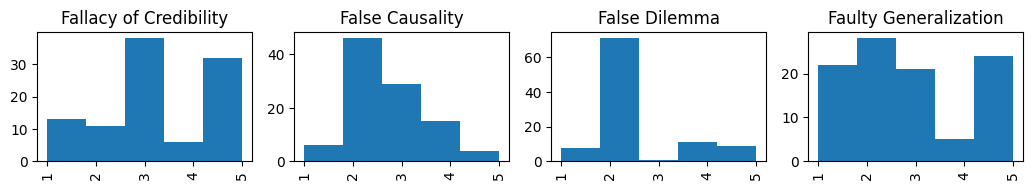

In [ ]:
from matplotlib import pyplot as plt

def plot_template_no_distribution(df):
    print("# of instances:", len(df))
    df["Template #"].hist(by=df["Fallacy Types"], layout=(1, 5), figsize=(13,2),
                          bins=len(df["Template #"].unique()), align='mid'
                          )
    # plt.xticks()
    plt.tight_layout()
    plt.show()

plot_template_no_distribution(df_ftc_all)

In [ ]:
FG_1 = []
FD_1 = []
FC_1 = []
FCred_1 = []
FG_2 = []
FD_2 = []
FC_2 = []
FCred_2 = []

In [ ]:
def filter_type(df,type,list_type):
  for i in range (len(df)):
    if df["Fallacy Types"][i] == type:
      list_type.append(df["Template # "][i])

In [ ]:
#dev
filter_type(df_dev,"Faulty Generalization",FG_1)
filter_type(df_dev,"False Dilemma",FD_1)
filter_type(df_dev,"False Causality",FC_1)
filter_type(df_dev,"Fallacy of Credibility",FCred_1)

#train
filter_type(df_test,"Faulty Generalization",FG_2)
filter_type(df_test,"False Dilemma",FD_2)
filter_type(df_test,"False Causality",FC_2)
filter_type(df_test,"Fallacy of Credibility",FCred_2)

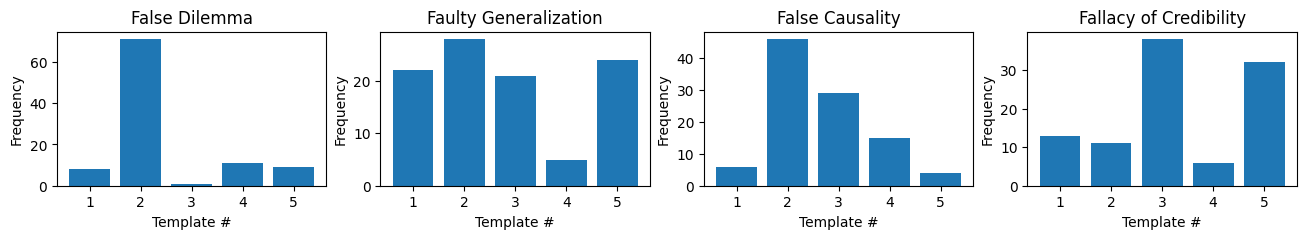

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 2))

FG_series = pd.Series(FG_1)
FD_series = pd.Series(FD_1)
FC_series = pd.Series(FC_1)
FCred_series = pd.Series(FCred_1)

# Count the frequency of each unique value
FG_values = FG_series.value_counts()
FD_values = FD_series.value_counts()
FC_values = FC_series.value_counts()
FCred_values = FCred_series.value_counts()

# Plot histogram
ax[0].bar(FD_values.index, FD_values.values)
ax[0].set_xlabel('Template #')
ax[0].set_ylabel('Frequency')
ax[0].set_title('False Dilemma')

ax[1].bar(FG_values.index, FG_values.values)
ax[1].set_xlabel('Template #')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Faulty Generalization')

ax[2].bar(FC_values.index, FC_values.values)
ax[2].set_xlabel('Template #')
ax[2].set_ylabel('Frequency')
ax[2].set_title('False Causality')

ax[3].bar(FCred_values.index, FCred_values.values)
ax[3].set_xlabel('Template #')
ax[3].set_ylabel('Frequency')
ax[3].set_title('Fallacy of Credibility')

plt.show()


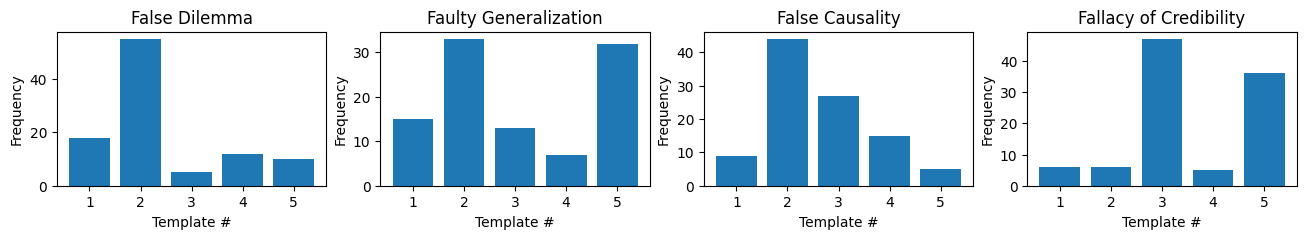

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 2))

FG_series = pd.Series(FG_2)
FD_series = pd.Series(FD_2)
FC_series = pd.Series(FC_2)
FCred_series = pd.Series(FCred_2)

# Count the frequency of each unique value
FG_values = FG_series.value_counts()
FD_values = FD_series.value_counts()
FC_values = FC_series.value_counts()
FCred_values = FCred_series.value_counts()

# Plot histogram
ax[0].bar(FD_values.index, FD_values.values)
ax[0].set_xlabel('Template #')
ax[0].set_ylabel('Frequency')
ax[0].set_title('False Dilemma')

ax[1].bar(FG_values.index, FG_values.values)
ax[1].set_xlabel('Template #')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Faulty Generalization')

ax[2].bar(FC_values.index, FC_values.values)
ax[2].set_xlabel('Template #')
ax[2].set_ylabel('Frequency')
ax[2].set_title('False Causality')

ax[3].bar(FCred_values.index, FCred_values.values)
ax[3].set_xlabel('Template #')
ax[3].set_ylabel('Frequency')
ax[3].set_title('Fallacy of Credibility')

plt.show()

# of instances: 200


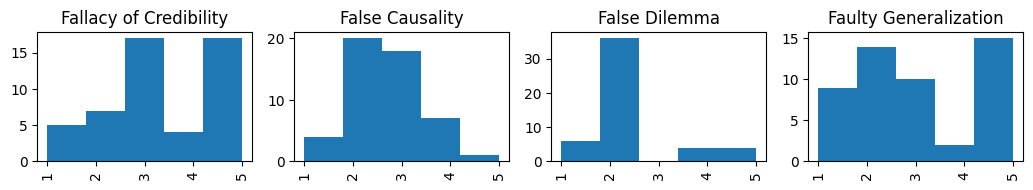

In [ ]:
plot_template_no_distribution(df_fs_train)

# of instances: 200


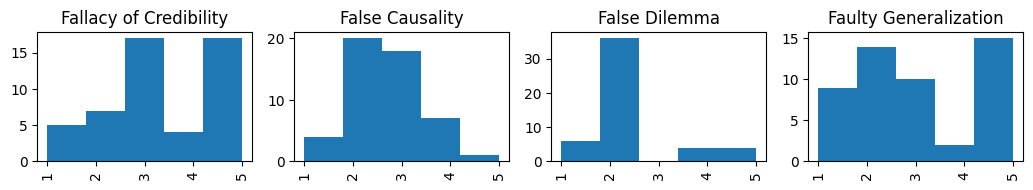

In [ ]:
plot_template_no_distribution(df_dev)

# of instances: 200


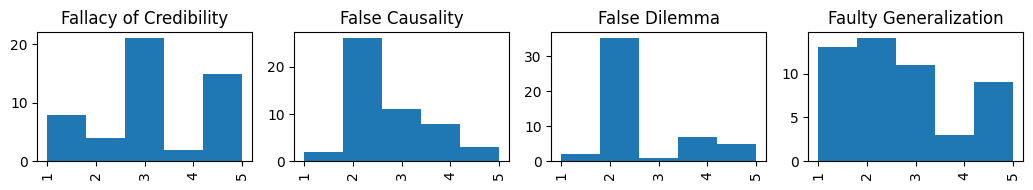

In [ ]:
plot_template_no_distribution(df_test)

# Experiments

## Setup

In [6]:
!pip install cohere
!pip install tiktoken
!pip uninstall typing-extensions -y quiet
!pip install typing-extensions==4.5.0 --quiet
!pip install --upgrade tensorflow-probability
!pip install --upgrade --quiet openai
!pip install tenacity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.5/178.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00
Found existing installation: typing_extensions 4.12.2
Uninstalling typing_extensions-4.12.2:
  Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

In [7]:
from google.colab import userdata
from openai import OpenAI
from tenacity import (
retry,
stop_after_attempt,
wait_random_exponential,
)

@retry(wait=wait_random_exponential(min=1, max=60), stop=stop_after_attempt(6))
def chatcompletion_with_backoff(cl, **kwargs):
    return cl.chat.completions.create(**kwargs)

## Prompts

In [8]:
MODEL_SETTING = "1-shot2" # @param ["Zero-shot", "1-shot", "5-shot","Zero-shot1","1-shot1","5-shot1","Zero-shot2","1-shot2","5-shot2"]
PROMPT_FN = {
    "Zero-shot": "prompts_20240207_opt1_zero.txt",
    "1-shot": "prompts_20240207_opt1_1shot.txt",
    "5-shot": "prompts_20240207_opt1_5shot.txt",
    "Zero-shot1": "prompts_20240207_opt2_zero.txt",
    "1-shot1": "prompts_20240207_opt2_1shot.txt",
    "5-shot1": "prompts_20240207_opt2_5shot.txt",
    "Zero-shot2": "prompts_20240207_opt3_zero.txt",
    "1-shot2": "prompts_20240207_opt3_1shot.txt",
    "5-shot2": "prompts_20240207_opt3_5shot.txt",
}[MODEL_SETTING]
MODEL = "gpt-4o" # @param ["gpt-4o", "gpt-3.5-turbo"]

In [9]:
import re

prompts = re.findall("=== (.*?) ===(.*?)===",
                     open(os.path.join(HOME, "data/", PROMPT_FN)).read(), flags=re.DOTALL)
prompts = {k: v.strip() for k, v in prompts}

print(PROMPT_FN)

prompts_20240207_opt3_1shot.txt


In [10]:
def create_prompt_for_fallacy_identification(query):
    return prompts["fallacy_identification"].strip().format(query)

print(create_prompt_for_fallacy_identification("I'm happy, so all people should be happy."))

Classify a given argument into one of the following fallacy types:
Fallacy of Credibility, Fallacy of Logic, False Causality, False Dilemma, or Faulty Generalization
Answer only the fallacy type.
No other words or explanation.
Argument:
I'm happy, so all people should be happy.


In [11]:
def create_prompt_for_structure_analysis(fallacy_type, query):
    prompt = prompts.get("fallacy_structure_analysis: {}".format(fallacy_type))
    if prompt is None:
        return None
    return prompt.format(query)

print(create_prompt_for_structure_analysis("Faulty Generalization", "We should not legalize marijuana because of blah."))
#print(create_prompt_for_structure_analysis("False Analogy", "We should not legalize marijuana because of blah."))

# Task
Identify the underlying structure of a fallacious argument which is a Faulty Generalization.
Given a list of fallacy templates, your task is to choose a template that best describes the underlying fallacy structure, choosing the template's placeholders, [A], [C], [A'], and [C'], directly from the input text. Additionally, the text must be a consecutive sequence of one or more terms without any conjugation. Please follow the output format.

# Definitions
Entity: a noun phrase in the input.
Event: a verb phrase in the input.
Placeholder: A fill-in-the-blank choice within a template. Each placeholder may either be an entity or an event.
Please note! Placeholders can ONLY be either an entity (i.e., noun phrase) or an event (i.e., verb phrase) and may not be any other type of phrase (e.g., prepositional phrase).

# List of Templates
Template No.1:
Premise 1: An entity/event [A] suppresses a good entity/event [C].
Premise 2: An entity/event [A] or [A'] suppresses a good entity/event [

## Analyzer

In [12]:
import re

api_key = api-key

class GPTFallacyAnalyzer:
    def __init__(self, model=MODEL):
        self.model = model
        self.client = client

    def identify_fallacy_type(self, query):
        prompt = create_prompt_for_fallacy_identification(query)

        response = chatcompletion_with_backoff(
            self.client,
            model=self.model,
            messages=[
                 # {"role": "system", "content": system_msg},
                 {"role": "user", "content": prompt}
                ],
            temperature=0,
            max_tokens=6,
            top_p=1.0,
            frequency_penalty=0.0,
            presence_penalty=0.0,
        )

        return response.choices[0].message.content

    def analyze_structure(self, fallacy_type, query):
        prompt = create_prompt_for_structure_analysis(fallacy_type, query)

        if prompt is None:
            return None

        response = chatcompletion_with_backoff(
            self.client,
            model=self.model,
            messages=[
                 # {"role": "system", "content": system_msg},
                 {"role": "user", "content": prompt}
                ],
            temperature=0,
            max_tokens=64,
            top_p=1.0,
            frequency_penalty=0.0,
            presence_penalty=0.0,
        )


        return response.choices[0].message.content


fa = GPTFallacyAnalyzer()

text = "Eating apples makes me happy, so all people should eat apples."
ft = fa.identify_fallacy_type(text)
print(ft)
st= fa.analyze_structure(ft, text)
print(st)

Faulty Generalization
Template No.=3
[A]=all people
[C]=happy
[A']=me
[C']=happy


## Run

### Setting 1: Fallacy Type-Given

In [13]:
df_dev = df_dev.reset_index(drop=True)
df_fs_train = df_fs_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
structure_predictions = [None for i in range(len(df_ftc_all))]

In [15]:
from tqdm.notebook import tqdm

fa = GPTFallacyAnalyzer(model=MODEL)

for i, row in tqdm(df_ftc_all.iterrows(), total=len(df_ftc_all)):
    if structure_predictions[i] is not None:
        continue

    structure_predictions[i] = fa.analyze_structure(row["Fallacy Types"], row["Whole_Sentences"])

  0%|          | 0/60 [00:00<?, ?it/s]

In [16]:
def parse_structure_analysis(text):
    m_temp_no = re.match(r"Template No\.=([0-9])", text)
    vars = dict(re.findall(r"\[([A-Z']+)\]=([^\n]+)", text))

    if m_temp_no is None:
        return {
            "template_no": 5,
            "slotfillers": {},
        }

    return {
        "template_no": int(m_temp_no.group(1)),
        "slotfillers": vars,
    }

print(parse_structure_analysis('Template No.=5\n[A]=\n[C]='))
print(parse_structure_analysis('Template No.=4\n[A]=eating candy\n[C]=cavities'))
print(parse_structure_analysis("Template No.=1\n[A]=being against religion\n[C]=being a very bad man\n[A']=Frankie is against religion\n[C']=Frankie also must be a very bad man"))

{'template_no': 5, 'slotfillers': {}}
{'template_no': 4, 'slotfillers': {'A': 'eating candy', 'C': 'cavities'}}
{'template_no': 1, 'slotfillers': {'A': 'being against religion', 'C': 'being a very bad man', "A'": 'Frankie is against religion', "C'": 'Frankie also must be a very bad man'}}


In [17]:
MODEL_FOLDER = "gpt4" # @param ["gpt3.5","gpt4"]
PROMPT_FOLDER = "prompt3" # @param ["prompt1","prompt2","prompt3"]
#SHOT_FOLDER = "zero" # @param ["zero", "one", "five"]

In [18]:
df_dev_c = df_ftc_all.copy()

def get_majority_template_no(ft):
    majority_baseline = df_fs_train[df_fs_train["Fallacy Types"] == ft]["Template #"].value_counts().to_dict()
    return max(majority_baseline, key=majority_baseline.get)

df_dev_c["predicted_template_no_bl_majority"] = [get_majority_template_no(row["Fallacy Types"]) for _, row in df_dev_c.iterrows()]


df_dev_c["predicted_template_no"] = [parse_structure_analysis(t)["template_no"] for t in structure_predictions]
df_dev_c["predicted_slot_fillers"] = [parse_structure_analysis(t)["slotfillers"] for t in structure_predictions]
df_dev_c.to_csv(os.path.join(HOME, "{}/{}/dev_predictions_{}.csv".format(MODEL_FOLDER,PROMPT_FOLDER,MODEL_SETTING.lower())), index=False)